# Q2 Rush Hour Rush: A race against time and distance (15 Marks)
## Trip Patterns Over Time and Distance
**Description:** Analyze taxi trip data to understand variations in trip frequency by time, distance, and seasonal patterns. You will need to interpret these visualizations in relation to time-based trends and how they impact taxi usage.

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./TaxiData_fixed.csv')

### 2.a Trip Frequency by Time of Day, Month, and Day (3 Marks):
#### (a) Create bar charts to visualize trip distributions for:

##### • Hours of the Day (to capture daily patterns and peak hours)

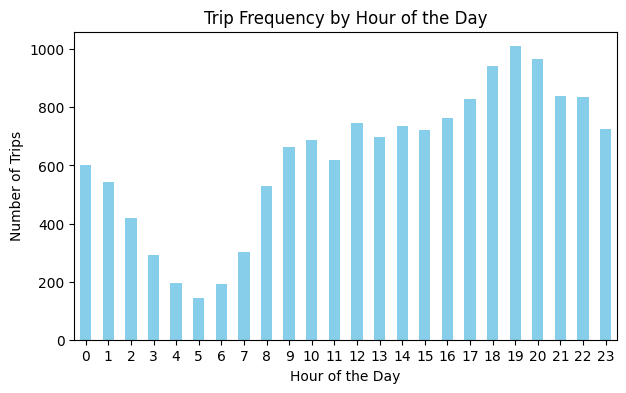

In [2]:
# Bar chart for trip distribution by Hour of the Day
plt.figure(figsize=(7,4))
df['trip_start_hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Trip Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

##### • Days of the Week (to identify weekday vs. weekend patterns)

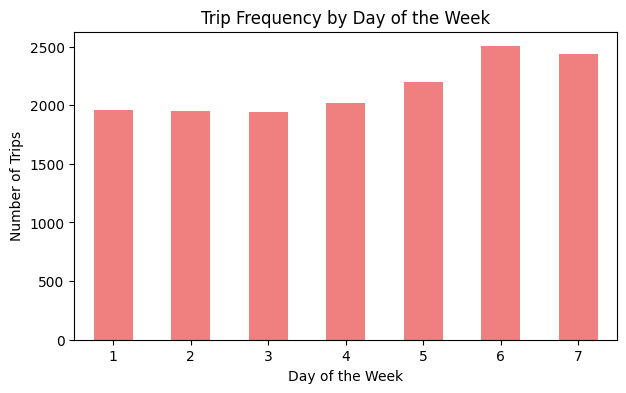

In [3]:
# # Bar chart for trip distribution by Day of the Week
plt.figure(figsize=(7,4))
df['trip_start_day'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Trip Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

##### • Months of the Year (to see seasonal trends, if any)

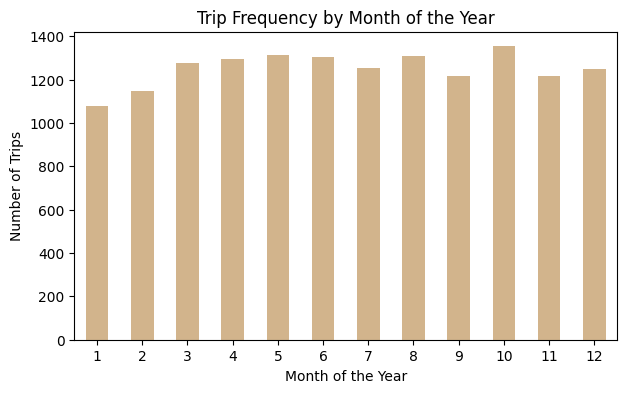

In [4]:
# # Bar chart for trip distribution by Month of the Year
plt.figure(figsize=(7,4))
df['trip_start_month'].value_counts().sort_index().plot(kind='bar', color='tan')
plt.title('Trip Frequency by Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

#### (b) Describe notable patterns, like peak hours, high-demand days and peak months. Discuss how these patterns could be relevant for managing taxi demand.

Peak demand hours are from 6 to 8 PM, while the lowest number of trips occurs between 3 and 7 AM. Weekends, specifically Saturday and Sunday, see the highest trip volumes, whereas Monday through Wednesday have the fewest trips. Throughout the year, April to June, August, and October are peak months, with October having the highest trip counts. Conversely, January and February have the lowest demand.

Understanding these peak hours, days, and months is crucial for managing taxi demand, as it enables taxi companies to allocate additional vehicles during high-demand periods to better meet passenger needs.


### 2.b Peak Hours and Distance Analysis (3 Marks):

#### (a) Identify Peak Hours: Create a heatmap showing trip frequency by the hour to identify the busiest hours for taxi trips.

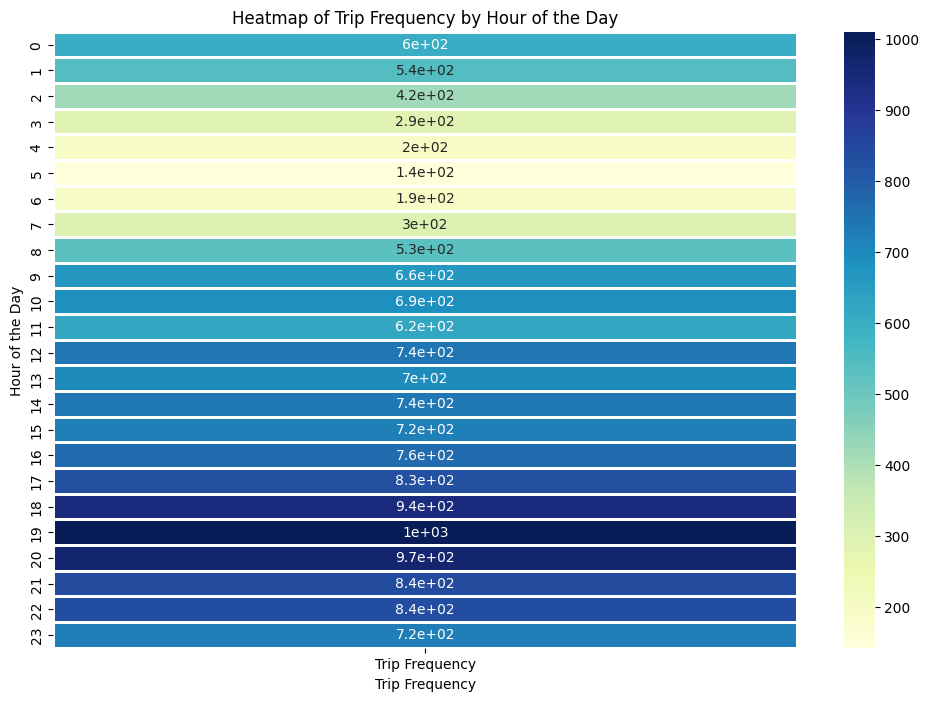

In [5]:
# Heatmap of Trip Frequency by Hour of the Day
hour_counts = df['trip_start_hour'].value_counts().sort_index()
hour_df = pd.DataFrame(hour_counts).reset_index()
hour_df.columns = ['Hour', 'Trip Frequency']
plt.figure(figsize=(12,8))
hour_pivot = hour_df.pivot_table(index=['Hour'], values='Trip Frequency')
sns.heatmap(hour_pivot, annot=True, cmap="YlGnBu", cbar=True, linewidths=1, linecolor='white')
plt.title("Heatmap of Trip Frequency by Hour of the Day")
plt.xlabel("Trip Frequency")
plt.ylabel("Hour of the Day")
plt.show()

#### (b) Distance Analysis: Use a histogram to analyze the distribution of trip distances during peak hours.

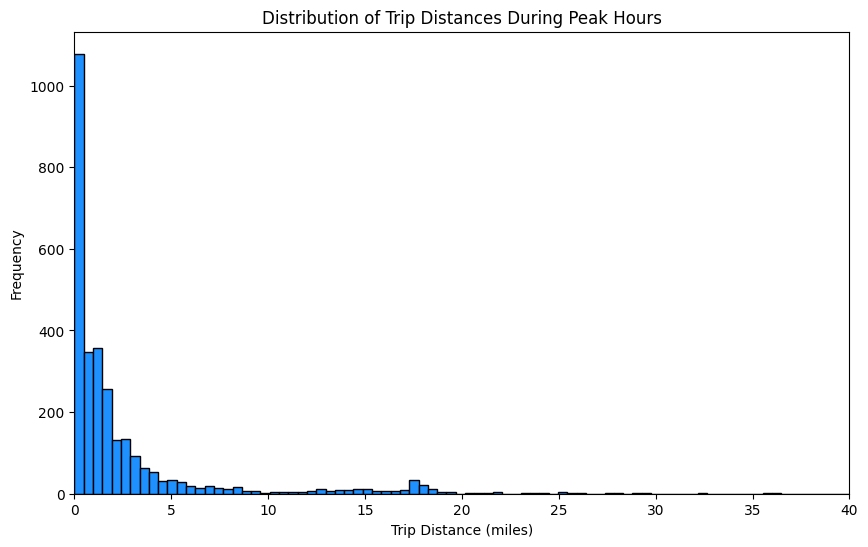

In [6]:
# Histogram for Trip Distance Distribution During Peak Hours
peak_hours_data = df[df['trip_start_hour'].isin([18, 19, 20])]
plt.figure(figsize=(10, 6))
plt.hist(peak_hours_data['trip_miles'].dropna(), bins=150, color='dodgerblue', edgecolor='black')
plt.xlim(0, 40)
plt.title("Distribution of Trip Distances During Peak Hours")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.show()

#### (c) Interpretation: Discuss how peak hours combined with distance trends might affect taxi service efficiency (e.g., congestion, longer wait times).

During the peak hours of 6 to 8 pm, most taxi trips are short, typically under 5 miles, reflecting high demand for local commutes. This high volume of short trips can lead to congestion, with more cars moving over short distances in busy areas, which in turn slows travel times and raises wait times for both passengers and drivers. Even brief trips may take longer due to traffic, impacting overall service efficiency. While drivers could potentially complete more trips within this period, delays may reduce their earnings. To improve efficiency, taxi services might consider surge pricing for short trips or increasing vehicle availability in high-demand zones. Additionally, traffic management or staggered peak-hour incentives could help distribute demand more evenly across routes.

### 2.c Trip Duration and Distance Distribution (3 Marks):

#### (a) Plot histograms for trip duration and trip distance to display their distributions. What can you infer from each histogram?

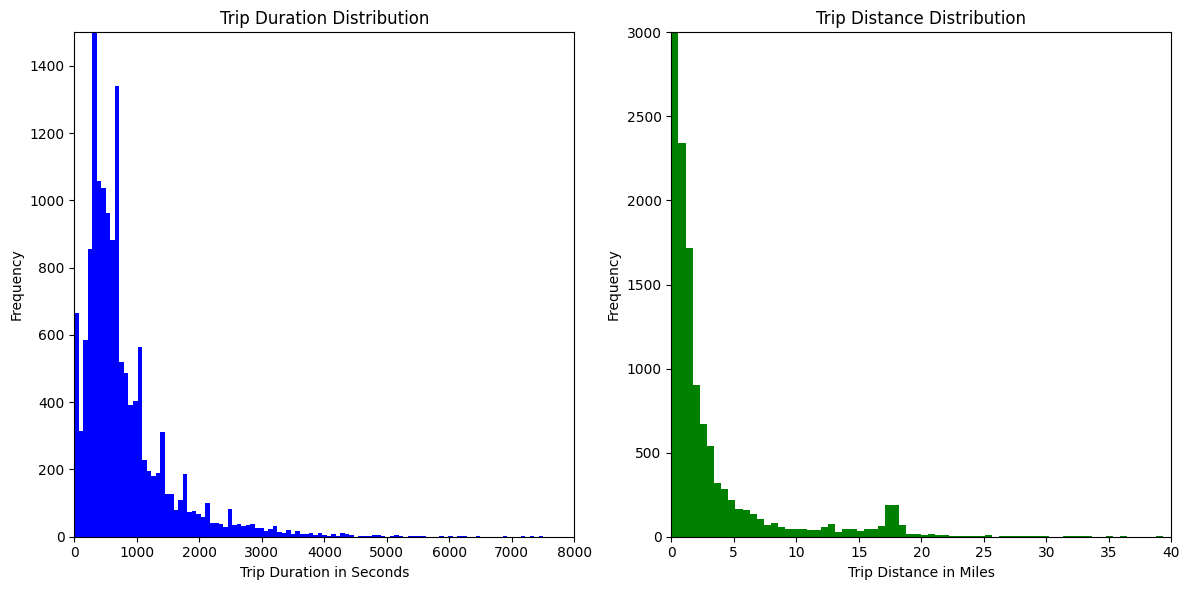

In [7]:
# Histogram for Trip Duration Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['trip_seconds'], bins=1000, color='blue')
plt.xlim(0, 8000)
plt.ylim(0, 1500)
plt.title('Trip Duration Distribution')
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Frequency')

# Histogram for Trip Distance Distribution
plt.subplot(1, 2, 2)
plt.hist(df['trip_miles'], bins=3000, color='green')
plt.xlim(0, 40)
plt.ylim(0, 3000)
plt.title('Trip Distance Distribution')
plt.xlabel('Trip Distance in Miles')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Both histograms show that short, quick trips dominate the data, indicating that most passengers use the service for nearby destinations. The small number of long-distance trips points to a demand primarily for local, high-turnover rides, typical of dense urban areas.

#### (b) Correlation Analysis: Use a scatter plot to show the relationship between trip duration and distance.

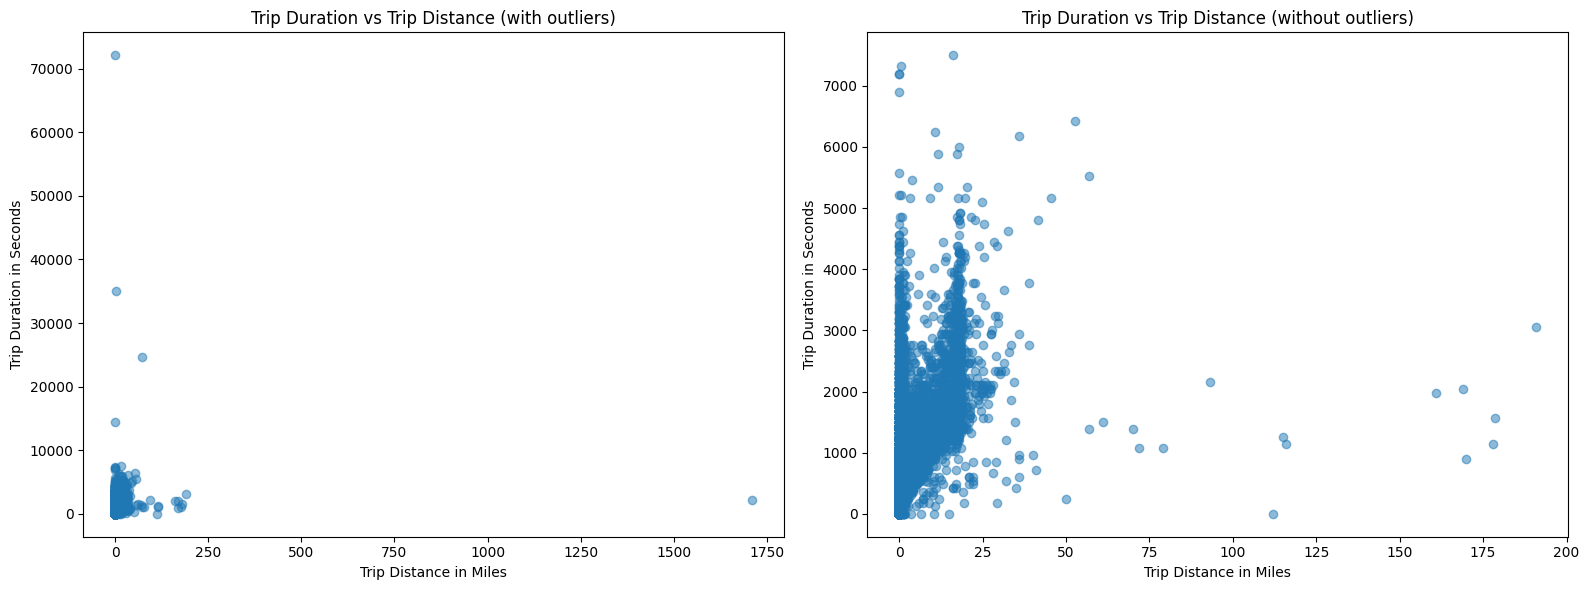

Correlation between trip duration and trip distance (with outliers): 0.16
Correlation between trip duration and trip distance (without outliers): 0.49


In [8]:
#plot scatter plot for trip duration vs trip distance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#with outliers
ax1.scatter(df['trip_miles'], df['trip_seconds'], alpha=0.5)
ax1.set_title('Trip Duration vs Trip Distance (with outliers)')
ax1.set_xlabel('Trip Distance in Miles')
ax1.set_ylabel('Trip Duration in Seconds')

#without outliers
df_no_outliers = df[(df['trip_seconds'] < 8000) & (df['trip_miles'] < 200)]
ax2.scatter(df_no_outliers['trip_miles'], df_no_outliers['trip_seconds'], alpha=0.5)
ax2.set_title('Trip Duration vs Trip Distance (without outliers)')
ax2.set_xlabel('Trip Distance in Miles')
ax2.set_ylabel('Trip Duration in Seconds')

plt.tight_layout()
plt.show()

correlation_with_outliers = df['trip_seconds'].corr(df['trip_miles'])
print(f"Correlation between trip duration and trip distance (with outliers): {correlation_with_outliers:.2f}")

correlation_without_outliers = df_no_outliers['trip_seconds'].corr(df_no_outliers['trip_miles'])
print(f"Correlation between trip duration and trip distance (without outliers): {correlation_without_outliers:.2f}")

#### (c) Interpretation: Comment on any noticeable outliers or trends, especially patterns that could influence route planning.

The correlation coefficient between trip duration and trip distance is 0.16 when outliers are included. However, after removing these outliers, the correlation coefficient rises to 0.49, indicating a moderate positive correlation between duration and distance. The scatter plot also reveals that most trips are under 3000 seconds and cover distances below 20 miles, with a few longer trips standing out as potential outliers. These outliers may be influenced by factors like traffic congestion or road closures, which impact travel time and distance. Identifying and analyzing these outliers is essential for understanding their effect on route planning and for optimizing travel routes for greater efficiency.

### 2.d Seasonal Trends in Taxi Usage and Distance (3 Marks):

#### (a) Use line charts to track the number of trips and average trip distance across months to identify seasonal peaks and lows.

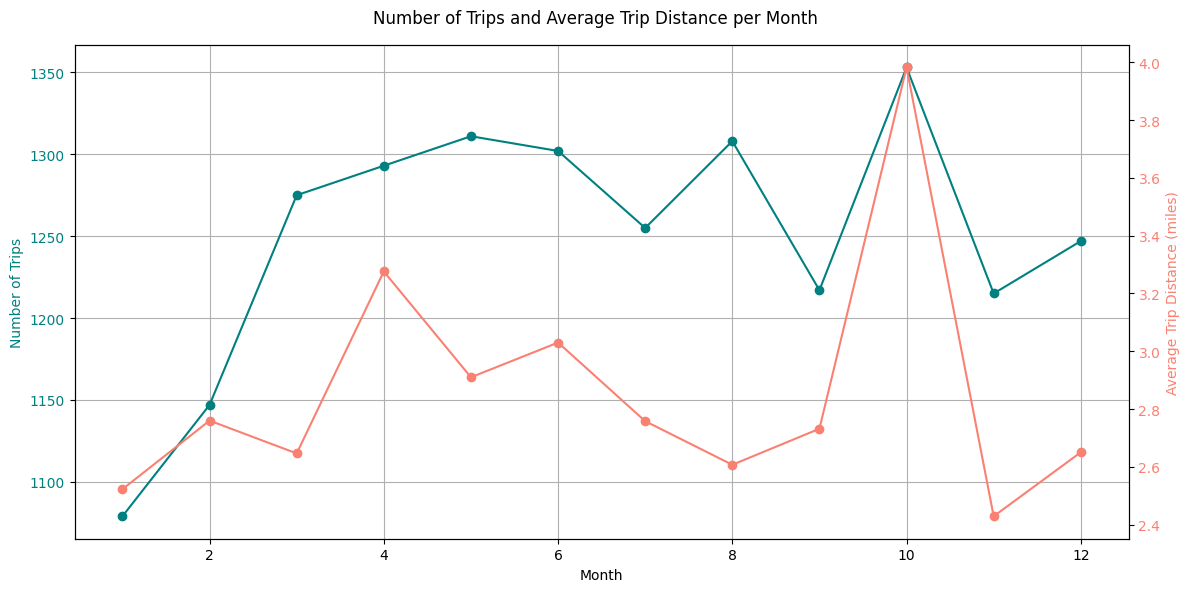

In [9]:
# Grouping data by month to calculate the number of trips and average trip distance
monthly_data = df.groupby('trip_start_month').agg(
    trip_count=('trip_start_month', 'size'),
    avg_trip_distance=('trip_miles', 'mean')
).reset_index()

# Setting up the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line chart for Number of Trips on primary y-axis
ax1.plot(monthly_data['trip_start_month'], monthly_data['trip_count'], marker='o', color='teal', label="Number of Trips")
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Trips", color="teal")
ax1.tick_params(axis='y', labelcolor="teal")
ax1.grid()

# Line chart for Average Trip Distance on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_data['trip_start_month'], monthly_data['avg_trip_distance'], marker='o', color='salmon', label="Average Trip Distance (miles)")
ax2.set_ylabel("Average Trip Distance (miles)", color="salmon")
ax2.tick_params(axis='y', labelcolor="salmon")

fig.suptitle("Number of Trips and Average Trip Distance per Month")
fig.tight_layout()
plt.show()

#### (b) Interpretation: Explain how these trends could influence resource allocation during high-demand periods (e.g., holiday season).

Insights from the demand analysis enable the company to optimize resource allocation and enhance both customer satisfaction and operational efficiency. For peak hours (6-8 PM), increasing the number of available drivers can reduce customer wait times by meeting the high demand directly. On weekends, especially Saturdays and Sundays, allocating more resources ensures that sufficient drivers are available to handle the surge in trips. During peak months like April to June, August, and particularly October, adding more vehicles and staff further accommodates seasonal demand spikes. Offering incentives for off-peak travel can help balance demand and alleviate pressure during peak times. Furthermore, scheduling longer trips during high-demand periods ensures vehicles remain available for shorter trips as needed. Scheduling maintenance during quieter months (January, February) and early weekdays maximizes vehicle uptime, ensuring resources are ready and optimized for high-demand periods.

### 2.e Distance vs. Time of Day (3 Marks):

#### (a) Plot the variation in trip distances across hours of the day to capture typical distance trends for peak and non-peak hours.

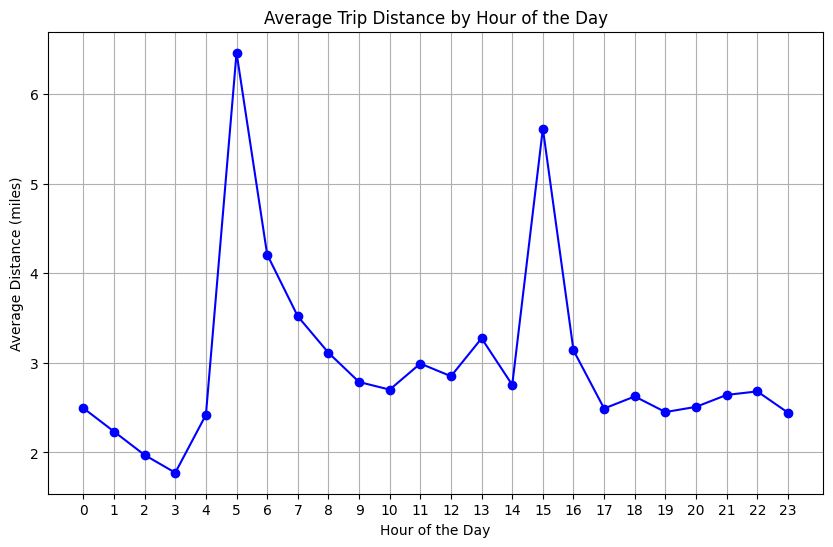

In [10]:
# Group the data and calculate the mean distance for each hour
hourly_distance = df.groupby('trip_start_hour')['trip_miles'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_distance['trip_start_hour'], hourly_distance['trip_miles'], marker='o', color='b')
plt.title('Average Trip Distance by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Distance (miles)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

#### (b) Interpretation: Explain your findings, including any insights into typical distance trends during peak and non-peak hours.

The graph reveals that travel patterns fluctuate throughout the day, with certain times linked to longer or shorter trips. Early morning (around 5 AM) and mid-afternoon (around 3 PM) see longer average trip distances, which suggests these times may be preferred for longer commutes or out-of-town travel. This could be due to fewer cars on the road in the early morning, making it a good time for longer trips, or due to school or work-related travel in the afternoon. In contrast, during late-night and evening hours, shorter trips dominate, likely reflecting more localized, routine activities like dining, shopping, or nightlife, where people are traveling shorter distances within their immediate area.This trend suggests that peak travel distances occur when people are traveling between cities or neighborhoods, while off-peak hours are primarily focused on nearby activities.